#Classification with feature selection
This lab asks you to create a classification model on the breast cancer dataset where the targeted class is in the Diagnosis column (M = malignant, B = benign).


*   Task 1:  Create a machine learning model with a full set of features to predict the targeted class. (don't forget to remove unique id column)
*   Task 2: Apply any teachniques on feature engineering to get a model with at least 95% accuracy



In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn import preprocessing
!gdown 1NNu6rF6AYUXsMlHjApMwGHbT7HxFTu5m

df = pd.read_csv("/content/Breast_Cancer_Wisconsin.csv")
df = df.iloc[:,:-1]
print(df.info())
print(df["diagnosis"].value_counts())
df.head()


Downloading...
From: https://drive.google.com/uc?id=1NNu6rF6AYUXsMlHjApMwGHbT7HxFTu5m
To: /content/Breast_Cancer_Wisconsin.csv
100% 125k/125k [00:00<00:00, 16.6MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Task 1

[[8.58257493e-05 1.86848672e-01 0.00000000e+00 ... 1.58560110e-01
  1.23135272e-01 1.43016613e-01]
 [9.80799554e-04 3.08185332e-01 1.35610416e-01 ... 3.15983465e-01
  2.86472819e-01 1.18129884e-01]
 [1.00554411e-03 3.72278487e-01 4.38620223e-01 ... 3.80640717e-01
  1.65613148e-01 1.63044192e-01]
 ...
 [9.93280466e-04 2.68065952e-01 1.05512344e-01 ... 9.23182914e-02
  1.71175727e-01 9.89559393e-02]
 [1.00739187e-01 2.62194824e-01 8.65742306e-02 ... 3.68584223e-01
  3.81036662e-01 1.35990544e-01]
 [9.55090784e-03 5.13185577e-01 5.06256341e-01 ... 5.92834998e-01
  1.40834387e-01 2.48144987e-01]]
['B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B

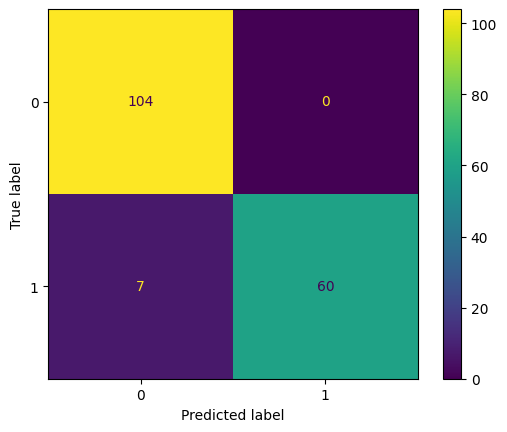

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       104
           M       1.00      0.90      0.94        67

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [87]:
from sklearn.preprocessing import OneHotEncoder
df1 = df.copy()
df1.drop("id",axis = 1)
x = df1.drop("diagnosis",axis =1)
y = df1['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2)


scaler = MinMaxScaler().fit(x_train) #create a scaler from only training dataset
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_predict = logisticRegr.predict(x_test)
#print(predictions)
print(y_predict)
#enc = OneHotEncoder
#enc_y_test = pd.DataFrame(enc.fit_transform(y_test))
#enc_y_predict = pd.DataFrame(enc.fit_transform(y_predict))
#enc_y_predict = pd.get_dummies(y_predict)

cm = np.array(confusion_matrix(y_test, y_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.show()

print(classification_report(y_test, y_predict))

# Task 2

[[9.33333902e-04 6.55272051e-02 2.57693608e-01 ... 6.01374570e-01
  5.24935935e-01 5.29501526e-01]
 [9.48830248e-04 6.56202556e-01 5.70172472e-01 ... 9.97594502e-01
  4.99310073e-01 6.21905731e-01]
 [9.33032139e-04 7.25794603e-02 1.40344944e-01 ... 1.74810997e-01
  3.38458506e-01 2.53136656e-01]
 ...
 [9.76812774e-03 3.23179392e-01 2.40446398e-01 ... 1.14536082e-01
  1.76029963e-01 5.22210919e-02]
 [9.87122310e-04 3.07997453e-01 3.35136963e-01 ... 6.27835052e-01
  3.18154938e-01 4.27772126e-01]
 [9.37167936e-04 2.19844263e-01 3.65573216e-01 ... 2.55360825e-01
  2.22550759e-01 1.16480163e-01]]
['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B

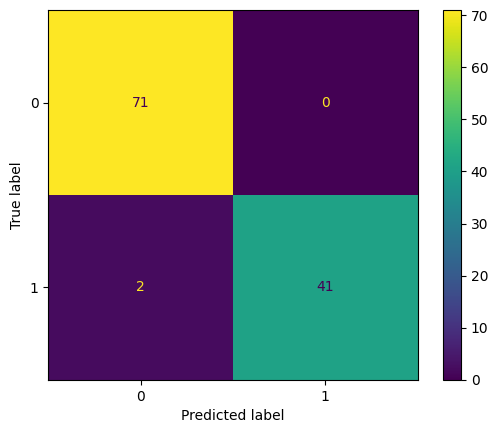

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [89]:
from sklearn.feature_selection import SelectKBest, f_classif


selector = SelectKBest(f_classif, k='all')
X_new = selector.fit_transform(x, y)

x_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler().fit(x_train) #create a scaler from only training dataset
x_train = scaler.transform(x_train)
X_test = scaler.transform(X_test)

print(x_train)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_predict = logisticRegr.predict(X_test)
#print(predictions)
print(y_predict)
#enc = OneHotEncoder
#enc_y_test = pd.DataFrame(enc.fit_transform(y_test))
#enc_y_predict = pd.DataFrame(enc.fit_transform(y_predict))
#enc_y_predict = pd.get_dummies(y_predict)

cm = np.array(confusion_matrix(y_test, y_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.show()

print(classification_report(y_test, y_predict))
